In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.neighbors import NearestNeighbors 
from sklearn.cluster import DBSCAN 
sns.set()

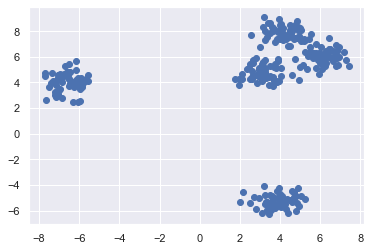

In [5]:
X,y=make_blobs(n_samples=300,centers=5,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [7]:
neigh=NearestNeighbors(n_neighbors=4)
neigh.fit(X)
distance,indices=neigh.kneighbors(X)

In [8]:
distance

array([[0.        , 0.41178842, 0.5017425 , 0.54498906],
       [0.        , 0.75328063, 0.79424371, 0.80224133],
       [0.        , 0.04394519, 0.10313279, 0.12894808],
       ...,
       [0.        , 0.10653737, 0.12174843, 0.12265763],
       [0.        , 0.03036232, 0.0520084 , 0.12458332],
       [0.        , 0.10503003, 0.24861544, 0.31032501]])

In [9]:
indices

array([[  0, 173, 196, 295],
       [  1, 109, 183, 101],
       [  2,  55, 100, 293],
       ...,
       [297, 137, 230, 231],
       [298, 225, 199,  56],
       [299, 160,  77,  83]], dtype=int64)

In [10]:
L=[]
for i in distance:
    L.append(max(i))

In [12]:
indices_final=[]
for i in indices:
    indices_final.append(i[-1])

In [20]:
L.sort()

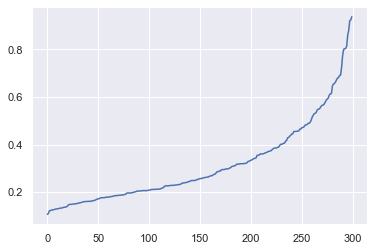

In [21]:
plt.plot(L)
plt.show()

In [22]:
db=DBSCAN(eps=0.4,min_samples=4)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [23]:
set(db.labels_)

{-1, 0, 1, 2, 3, 4}

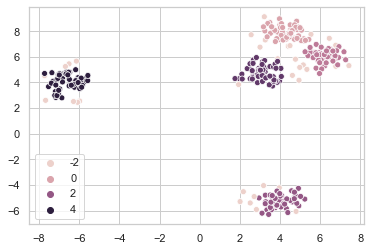

In [27]:
sns.scatterplot(X[:,0],X[:,1],hue=db.labels_)

In [28]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [29]:
cluster=db.labels_

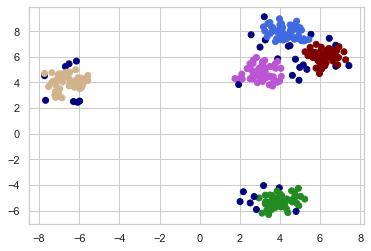

In [30]:
plt.scatter(X[:,0],X[:,1],c=vectorizer(cluster))
plt.show()